In [1]:
'''
__author__ = 'Alex Cheng'
ensemble 集成方法：bagging, boosting, RF

决策树过拟合，交叉验证,设置树深度，和最小叶子节点数

# 决策树的深度 控制二元决策树模型的负载度，他的效果类似于惩罚回归模型的惩罚系数项
# 树深最后过拟合了，决策树深度的增加意味着在付出额外的复杂度基础上，
# 可以从数据中提取更复杂的行为

# 最佳模型的复杂度是数据集规模的函数，当样本从100增加到1000时，最佳书深度从3增加到4，
# 增加的数据支持更复杂的模型，另外均方误差有轻微的下降

'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import datasets,linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.externals.six import StringIO
from math import sqrt

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [12]:
# 合成数组的产生
n = 1000
xt = [(float(i)/float(n) - 0.5) for i in range(n+1)]
x = [[s] for s in xt]
# y has random noise added to x-value
# set seed
np.random.seed(1)
y = [s + np.random.normal(scale=0.1) for s in xt] # 上市正态分布的噪音(0,1) * 0.1

print(len(x),len(x[0]))

1001 1


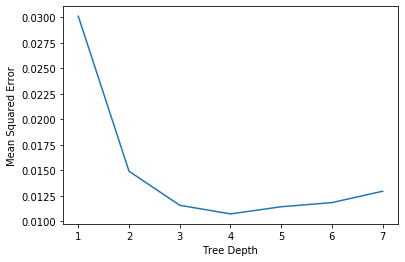

In [13]:
nrows = len(x) # 样本数量
depList = [1,2,3,4,5,6,7] # 树深度
xvalMSE = [] # 测试误差
nxval = 10 #  10 折交叉验证

for dep in depList:
    for ixval in range(nxval):
        # Define test and traing index sets
        idxTest =  [i for i in range(nrows) if i % nxval == ixval]
        idxTrain = [i for i in range(nrows) if i % nxval != ixval]
        #idxTest =  [i for i in range(nrows) if i % nxval ==0]
        #idxTrain = [i for i in range(nrows) if i % nxval !=0]

        # 定义测试和训练的属性和列表
        xTrain = [x[r] for r in idxTrain]
        xTest  = [x[r] for r in idxTest]
        yTrain = [y[r] for r in idxTrain]
        yTest  = [y[r] for r in idxTest] # 列向量
    
        # ElasticNet， 已经normlized，fit_intercept为False
        # coefs.shape = (60,100), 60个栏位，每组数据100次alpha尝试
        #alphas,coefs,_ = linear_model.enet_path(xTrain,yTrain,l1_ration=0.8,fit_intercept=False,return_models=False)
        
        # 训练树
        treeModel = DecisionTreeRegressor(max_depth=dep)
        treeModel.fit(xTrain,yTrain)
        
        treePred = treeModel.predict(xTest)
        error = [yTest[r] - treePred[r] for r in range(len(yTest))]
        
        if ixval == 0:
            oosErrors = sum([e * e for e in error]) # 第一次错误
        else:
            oosErrors += sum([e * e for e in error]) # 后续追加错误
    
    mse = oosErrors/nrows
    xvalMSE.append(mse)

plt.plot(depList,xvalMSE)
plt.axis('tight')
plt.xlabel('Tree Depth')
plt.ylabel('Mean Squared Error')
plt.show()



In [ ]:
simpleTree2 = DecisionTreeRegressor(max_depth=2)
simpleTree2.fit(x,y)

yHat = simpleTree2.predict(x)
plt.figure()
plt.plot(xt,y,label='Ture y')
plt.plot(xt,yHat,label='Tree Prediction', linestyle='--')
plt.legend(bbox_to_anchor=(1,0.2))
plt.axis('tight')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
